In [5]:
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv(r'C:\Users\Night\Downloads\NSE-TATAGLOBAL11.csv')

#print the head
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [6]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']


In [7]:
df.head(2)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2018-10-08,2018-10-08,208.0,222.25,206.85,216.00,215.15,4642146.0,10062.83
2018-10-05,2018-10-05,217.0,218.60,205.90,210.25,209.20,3519515.0,7407.06


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2018-10-08 to 2013-10-08
Data columns (total 8 columns):
Date                    1235 non-null datetime64[ns]
Open                    1235 non-null float64
High                    1235 non-null float64
Low                     1235 non-null float64
Last                    1235 non-null float64
Close                   1235 non-null float64
Total Trade Quantity    1235 non-null float64
Turnover (Lacs)         1235 non-null float64
dtypes: datetime64[ns](1), float64(7)
memory usage: 86.8 KB


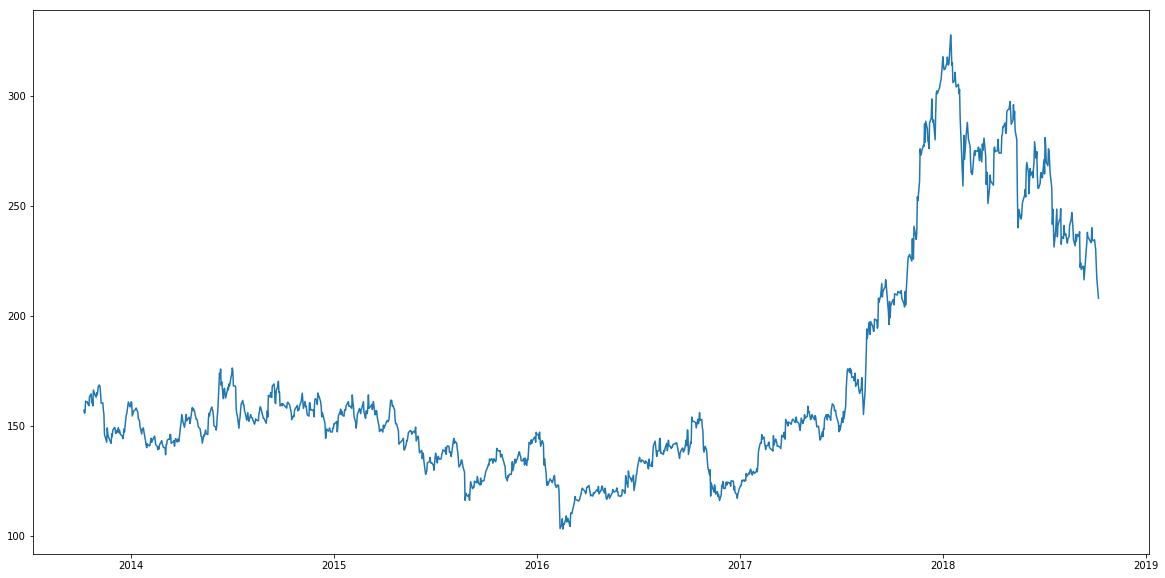

In [14]:
plt.figure(figsize=(20,10))
plt.plot(df['Open'], label='Close Price history')

In [21]:
data = df.sort_index(ascending=True , axis=0)
data.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2013-10-08,2013-10-08,157.00,157.80,155.20,155.80,155.80,1720413.0,2688.94
2013-10-09,2013-10-09,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49
2013-10-10,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
2013-10-11,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
2013-10-14,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
2013-10-15,2013-10-15,160.00,160.20,155.35,157.10,158.05,1145582.0,1805.49
2013-10-17,2013-10-17,159.10,162.90,158.25,161.75,162.00,2724697.0,4381.60
2013-10-18,2013-10-18,163.20,165.00,162.25,164.00,164.20,2540836.0,4163.49
2013-10-21,2013-10-21,164.50,165.35,159.00,159.80,159.60,3257249.0,5252.89


In [22]:
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [25]:
#splitting into train and validation
train = new_data[:987]
valid = new_data[987:]

In [28]:
new_data.shape, train.shape,valid.shape


((1235, 2), (987, 2), (248, 2))

In [41]:
train['Close'].min(), train['Close'].max(), valid['Close'].min(), valid['Close'].max()


(nan, nan, nan, nan)

In [42]:
#split into train and validation
x_train = new_data[:987]
y_valid = new_data[987:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [39]:
#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

C:\Users\Night\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Night\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


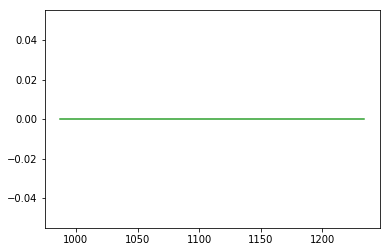

In [43]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[987:].index
train.index = new_data[:987].index

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

In [44]:
# k-Nearest Neighbours


In [46]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [47]:
#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [48]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

nan

C:\Users\Night\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Night\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


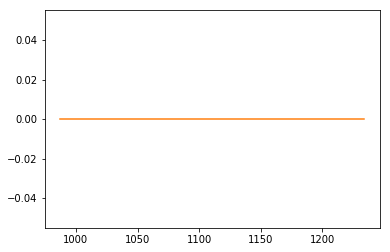

In [49]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['Close', 'Predictions']])
plt.plot(train['Close'])

# Auto ARIMA
### Introduction
### ARIMA is a very popular statistical method for time series forecasting. ARIMA models take into account the past values to predict the future values. There are three important parameters in ARIMA:

    1. p (past values used for forecasting the next value)
    2.q (past forecast errors used to predict the future values)
    3.d (order of differencing)
### Parameter tuning for ARIMA consumes a lot of time. So we will use auto ARIMA which automatically selects the best combination of (p,q,d) that provides the least error. To read more about how auto ARIMA works, refer to this article:

In [53]:
from pyramid.arima import auto_arima


ModuleNotFoundError: No module named 'pyramid'

In [54]:
from pyramid.arima import auto_arima

data = df.sort_index(ascending=True, axis=0)

train = data[:987]
valid = data[987:]

training = train['Close']
validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=248)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])


ModuleNotFoundError: No module named 'pyramid'

In [55]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rms

NameError: name 'forecast' is not defined

NameError: name 'forecast' is not defined

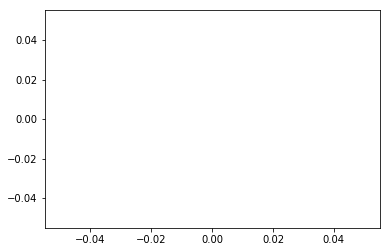

In [56]:
#plot
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Prediction'])


In [57]:
""""Long Short Term Memory (LSTM)
Introduction
LSTMs are widely used for sequence prediction problems and have proven to be extremely effective. The reason they work so well is because LSTM is able to store past information that is important, and forget the information that is not. LSTM has three gates:

The input gate: The input gate adds information to the cell state
The forget gate: It removes the information that is no longer required by the model
The output gate: Output Gate at LSTM selects the information to be shown as output
For a more detailed understanding of LSTM and its architecture, you can go through the below article:

Introduction to Long Short Term Memory
For now, let us implement LSTM as a black box and check it’s performance on our particular data."""

'"Long Short Term Memory (LSTM)\nIntroduction\nLSTMs are widely used for sequence prediction problems and have proven to be extremely effective. The reason they work so well is because LSTM is able to store past information that is important, and forget the information that is not. LSTM has three gates:\n\nThe input gate: The input gate adds information to the cell state\nThe forget gate: It removes the information that is no longer required by the model\nThe output gate: Output Gate at LSTM selects the information to be shown as output\nFor a more detailed understanding of LSTM and its architecture, you can go through the below article:\n\nIntroduction to Long Short Term Memory\nFor now, let us implement LSTM as a black box and check it’s performance on our particular data.'

In [59]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:987,:]
valid = dataset[987:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

ModuleNotFoundError: No module named 'keras'

In [60]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

NameError: name 'closing_price' is not defined

In [61]:
#for plotting
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])


NameError: name 'closing_price' is not defined